In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
with open('steady_data_2.json') as f:
    data = pd.read_json(f)

data['data'].head()


0    30.1,1022.46,57.01426816622416,9.9858298333485...
1    30.13,1022.65,57.01426799986098,9.985833000077...
2    30.13,1022.66,57.01426783349779,9.985833333333...
3    30.13,1022.65,57.01426733334859,9.985832833449...
4    30.13,1022.62,57.01426666683621,9.985833333333...
Name: data, dtype: object

In [22]:
df = pd.DataFrame(
    columns=["temp", "pressure", "latitude", "longitude", "altitude", "speed", "course"]
)
for i, line in enumerate(data["data"]):
    a = line.split(",")
    df.loc[i] = [
        float(a[0]),
        float(a[1]),
        float(a[2]),
        float(a[3]),
        (a[4][5:-1] if a[4] != "None" else None),
        (a[5][5:-1] if a[5] != "None" else None),
        (a[6][5:-1] if a[6] != "None" else None),
    ]


,temp,pressure,latitude,longitude,altitude,speed,course
0,30.10,1022.46,57.014268,9.985830,30.2,0.16153541,None
1,30.13,1022.65,57.014268,9.985833,30.5,0.15381876,None
2,30.13,1022.66,57.014268,9.985833,30.3,0.048357733,None
3,30.13,1022.65,57.014267,9.985833,30.1,0.050929956,None
4,30.13,1022.62,57.014267,9.985833,29.7,0.022635536,None


In [23]:
#print all the variation of the different columns
b = df['altitude'].dropna().astype(float)
c = df['speed'].dropna().astype(float)
d = df['course'].dropna().astype(float)
print(df['temp'].var(),df['pressure'].var(),df['latitude'].var(),df['longitude'].var(),b.var(),c.var(),d.var())


0.01135029773843281 0.0036458537934845776 4.950012648154604e-09 6.169198512229982e-09 322.8310754893146 0.0042174041090347406 nan


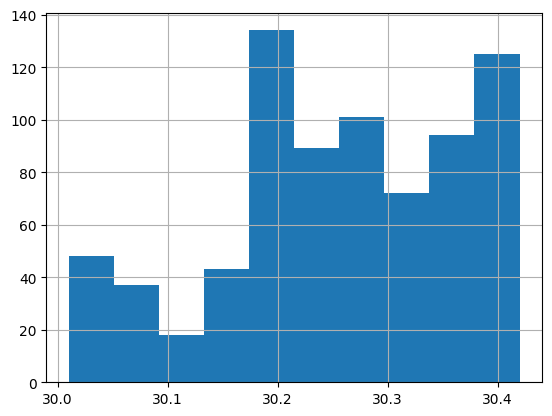

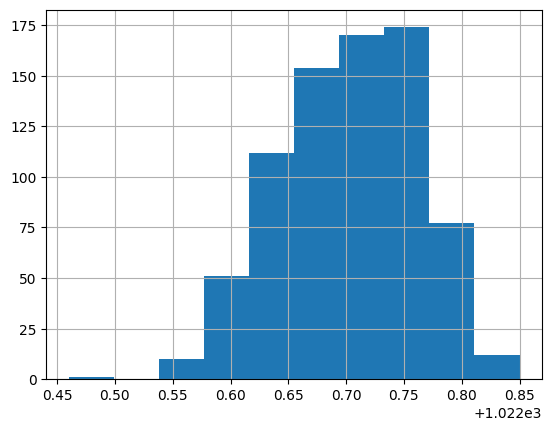

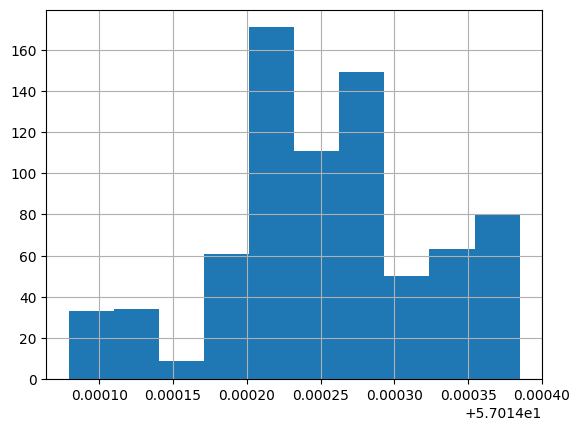

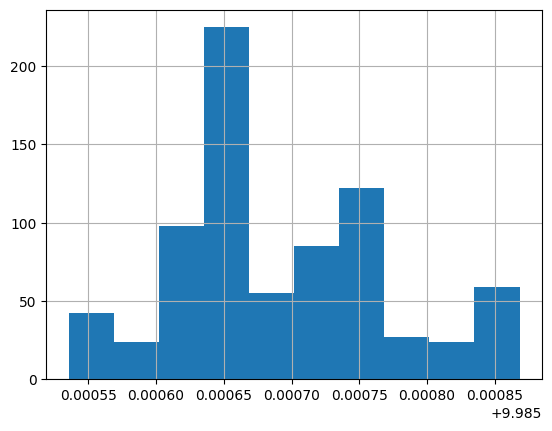

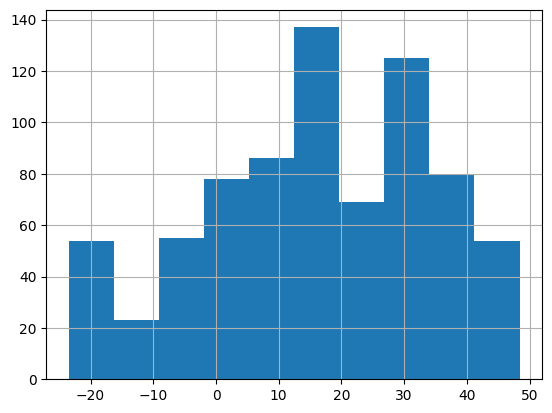

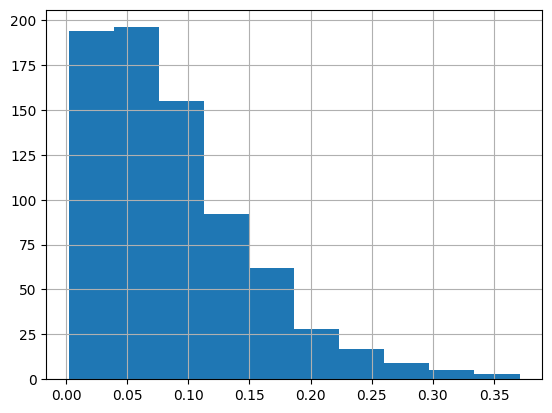

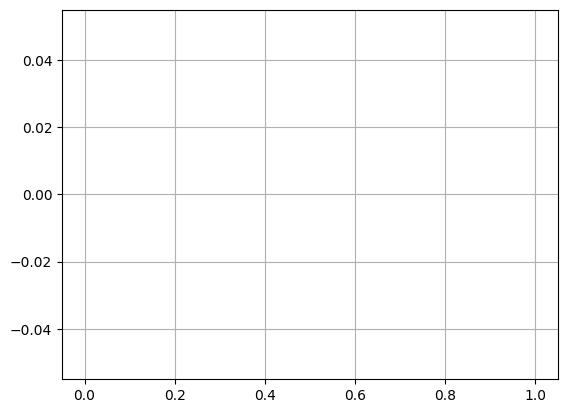

In [24]:
# Show histogram of the different columns
df['temp'].hist()
plt.show()
df['pressure'].hist()
plt.show()
df['latitude'].hist()
plt.show()
df['longitude'].hist()
plt.show()
b.hist()
plt.show()
c.hist()
plt.show()
d.hist()
plt.show()

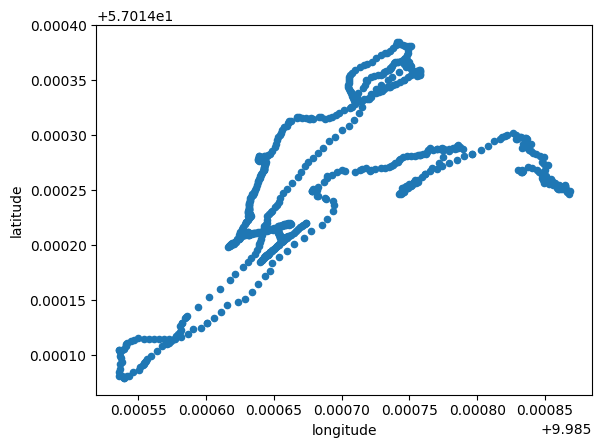

In [25]:
# Scatterplot of the lattiude vs longitude
df.plot.scatter(y='latitude',x='longitude')
plt.show()

In [28]:
# Making the framework for a kalman filter
from pykalman import KalmanFilter

phi = np.array([  [1,0,0,del_t,0,0],
                [0,1,0,0,del_t,0],
                [0,0,1,0,0,del_t],
                [0,0,0,1,0,0],
                [0,0,0,0,1,0],
                [0,0,0,0,0,1]])
G = np.array([  [0,0,0],
                [0,0,0],
                [0,0,0],
                [del_t,0,0],
                [0,del_t,0],
                [0,0,del_t]])
# H = np.array([  [1,0,0,0,0,0,0],
#                 [0,1,0,0,0,0,0],
#                 [0,0,1,0,0,0,0],
#                 [0,0,0,1,0,0,0],
#                 [0,0,0,0,
#                 )
v_alt = np.array([5,5,5,5])
v_alt.var()
R = np.eye(7)*np.array([df['latitude'].var(),df['longitude'].var(),b.var(),v_alt.var(),df['pressure'].var(),c.var(),d.var()])


array([[4.95001265e-09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,            nan],
       [0.00000000e+00, 6.16919851e-09, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,            nan],
       [0.00000000e+00, 0.00000000e+00, 3.22831075e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.64585379e-03, 0.00000000e+00,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.21740411e-03,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,            nan]])